In [59]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv("D:/credit_card_fraud_dataset.csv")
print(df.columns)

Index(['TransactionID', 'TransactionDate', 'Amount', 'MerchantID',
       'TransactionType', 'Location', 'IsFraud'],
      dtype='object')


In [61]:
print(df.isnull().sum())

TransactionID      0
TransactionDate    0
Amount             0
MerchantID         0
TransactionType    0
Location           0
IsFraud            0
dtype: int64


In [62]:
scaler = StandardScaler()
df[['Amount']] = scaler.fit_transform(df[['Amount']])

In [63]:
X = df.drop(['IsFraud', 'TransactionID', 'TransactionDate', 'MerchantID', 'TransactionType', 'Location'], axis=1)
y = df['IsFraud']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [67]:
y_prob = log_reg.predict_proba(X_test)[:,1]

In [70]:
fpr, tpr, thresgolds = roc_curve(y_test,y_prob)
roc_auc = roc_auc_score(y_test,y_prob)

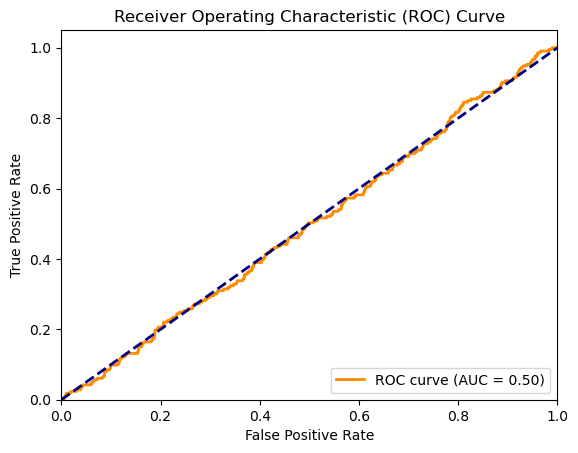

In [77]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [79]:
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_prob)

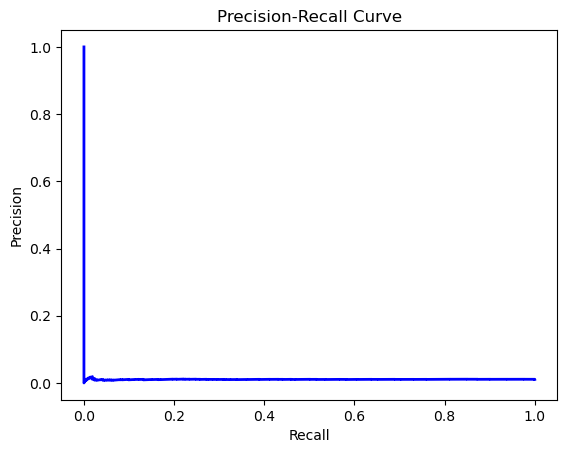

In [85]:
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [87]:
pr_auc = auc(recall, precision)
print(f'Precision-Recall AUC: {pr_auc:.2f}')

Precision-Recall AUC: 0.01
